<a href="https://colab.research.google.com/github/MaCoZu/NLP/blob/main/01_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [ ]:
!pip install -q holoviews
import holoviews as hv
hv.extension('matplotlib')

# Load MNIST Dataset

In [ ]:
(dataset_train_original, dataset_validate_original, dataset_validate_original), info = tfds.load(
                     "mnist",
                     as_supervised=True,
                     split=['train','test[:50%]','test[50%:]'], # train, test, validate
                     with_info=True,
                   )
info

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1.incompleteR6WX9T',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }"""

In [ ]:
layout = []
for x, y in dataset_train_original.shuffle(60000).take(2):
  img = hv.Image(x.numpy(), group = f"{y}")
  layout.append(img)

:Layout
   .A_7.I :Image   [x,y]   (z)
   .A_3.I :Image   [x,y]   (z)
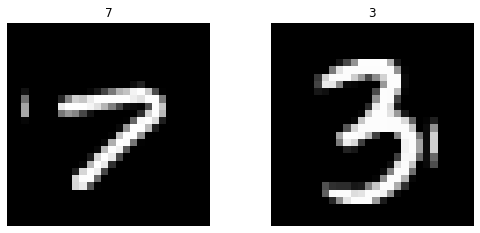

In [ ]:
opts = hv.opts.Image(cmap='gray', sublabel_format='', xaxis=None, yaxis=None, padding=0)
hv.Layout(layout).opts(opts).opts(tight=True)

# Pipelines

In [ ]:
def encode(image, label):
  image = tf.image.convert_iamge_dtype(image, tf.float32)
  return image, label

dataset = dataset_train_original.map(lambda image, label: encode(image, label) )

In [ ]:
for image, labels in datasets.take(1):
  plt.imsoh(image, cmap='gray')
  plt.title(f'Label: {label}')
  plt.show()
  plt.(image.dtype)
